## Parcial Final

In [368]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import pandas as pd
import scipy.optimize as spo

## Teórico:

Partiendo de las siguientes premisas:
    
$$
\sum \vec F =m(\vec a +2 \vec w \times \vec v)\\
\vec w=[-wcos\lambda,0,wsin\lambda]\\
\vec r= [rcos\theta,rsin\theta,r]
$$

Y de que $wr=v$. Podemos obtener el vector de velocidad a partir de:


$$
\begin{equation}
\begin{split}
\vec v&=\vec w\times \vec r \\
&=\begin{pmatrix}
-wrsin\theta sin\lambda\\
wrcos\lambda\\
-wrcos\lambda sin\theta
\end{pmatrix}
\end{split}
\end{equation}
$$


De modo que se puede plantear la siguiente ecuación:

$$\begin{equation}
\begin{split}
-m\begin{pmatrix}
0\\
0\\
g
\end{pmatrix}
&= 
m\Big(\begin{pmatrix}
\ddot{x}\\
\ddot{y}\\
\ddot{z}
\end{pmatrix} + 2\begin{pmatrix}
-wcos\lambda\\
0\\
wsin\lambda
\end{pmatrix}\times \begin{pmatrix}
-wrsin\theta sin\lambda\\
wrcos\lambda\\
-wrcos\lambda sin\theta
\end{pmatrix}
\Big)\\
-\begin{pmatrix}
0\\
0\\
g
\end{pmatrix}&=\begin{pmatrix}
\ddot{x}\\
\ddot{y}\\
\ddot{z}
\end{pmatrix} +2\begin{pmatrix}
-w^2 r sin\lambda cos\lambda\\
w^2rsin^2\theta sen\theta + w^2rcos^2\lambda cos\theta\\
-w^2 r cos^2\lambda
\end{pmatrix}
\end{split}
\end{equation}
$$

De esta manera obtenemos el siguiente sistema de ecuaciones:

$$
\begin{equation}
\begin{split}
\ddot{x}&=2w^2rsin^2 \lambda cos \lambda \\
\ddot{y}&=-2w^2rcos^2\lambda sin\theta - 2w^2rsin\lambda sin\theta\\
\ddot{z}&=-g+2w^2rcos^2\lambda
\end{split}
\end{equation}
$$

Y teniendo en cuenta el vector de velocidad hallado previamente tenemos que:

$$
\begin{equation}
\begin{split}
\dot{x}&=wrsin\lambda sin\theta\\
\dot{y}&=wrcos\lambda\\
\dot{z}&=wrcos\lambda sin\theta
\end{split}
\end{equation}
$$

Por lo tanto, llegamos a:

$$
\begin{equation}
\begin{split}
\ddot{x}&=2wsin\lambda \dot{y}\\
\ddot{y}&=-2wcos\lambda \dot{z}-2wsin\lambda \dot{x}\\
\ddot{z}&=-g + 2wcos\lambda \dot{y}
\end{split}
\end{equation}
$$

## Parte 1

a, b)

In [369]:
datos=pd.read_csv('Datos.txt')
lam_30= datos[datos.angle==30]
lam_30

,h,angle,y,sigmay
20,10.0,30.0,0.0013,0.0015
21,20.0,30.0,0.0017,0.0015
22,30.0,30.0,0.0038,0.0015
23,40.0,30.0,0.0059,0.0015
24,50.0,30.0,0.0067,0.0015
25,60.0,30.0,0.0094,0.0015
26,70.0,30.0,0.0122,0.0015
27,80.0,30.0,0.0132,0.0015
28,90.0,30.0,0.0151,0.0015
29,100.0,30.0,0.0186,0.0015


c)

In [370]:
h_=sym.Symbol('h',real=True)
w_=sym.Symbol('w',real=True)
lamd=sym.Symbol('lambda',real=True)
g_=sym.Symbol('g',real=True)

def Coriolis_sym(h,w,lam,g):
    res=(2*(2**(1/2))/3) *w*sym.cos(lam)*((h**3)/g)**(1/2)
    return res

Coriolis_sym(h_,w_,lamd,g_)

0.942809041582063*w*(h**3/g)**0.5*cos(lambda)

In [371]:
def Coriolis_np(h,w,lam,g):
    ang=lam*2*np.pi/360
    res=(2*(2**(1/2))/3) *w*np.cos(ang)*((h**3)/g)**(1/2)
    return res

d)

In [372]:
def chi2(w,h,y,sigmay,angle,g):
    resp=np.sum((y-Coriolis_np(h,w,angle,g))**2 /(2*sigmay**2))
    return resp

e)

In [373]:
h=lam_30.h
y=lam_30.y
sigmay=lam_30.sigmay
angle=lam_30.angle
g=9.81

nll=lambda *w:chi2(*w)
p0=np.ones(1)


In [374]:
minimizar = spo.minimize( nll, p0, args=(h,y,sigmay,angle,g),options={'disp':True} )

bestparam=minimizar.x
bestparam


Optimization terminated successfully.
         Current function value: 1.145718
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4


array([7.24399804e-05])

f)

Text(0, 0.5, 'y[m]')

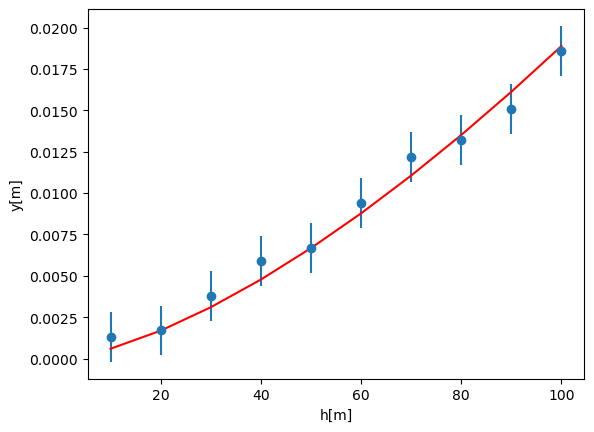

In [375]:
_x = np.linspace(np.min(h),np.max(h),10)
_y = Coriolis_np(_x,bestparam,angle,g)

plt.errorbar(h,y,yerr=sigmay,fmt='o')
plt.plot(_x,_y,color='r')
plt.xlabel('h[m]')
plt.ylabel('y[m]')

## Parte 2:
## Propagarción de la incertidumbre de la aceleración de la gravedad:

a, b, c, d, e)

In [376]:
y_arr=np.array(y)
h=np.array(h)
sigmay_arr=np.array(sigmay)
N=300

In [377]:
def Optimizar(lamb,y,h,sigmay):
    Gravedad=np.zeros(300)
    Omega=np.zeros(300)

    for i in range(N):
        g_i= 9.81+np.random.normal(loc=0,scale=1)
        y_n=y_arr+np.random.normal(loc=0,scale=sigmay_arr[0],size=len(y_arr))
        Gravedad[i]=g_i
        optim = spo.minimize( nll, p0, args=(h,y_n,sigmay,lamb,g_i),options={'disp':True} )
        Omega[i]=optim.x
        
    return Omega,Gravedad

f)

In [378]:
def DistConjunta(Omega,Gravedad):
    binsx=np.linspace(min(Omega),max(Omega),33)
    binsy=np.linspace(min(Gravedad),max(Gravedad),33)
    H2,binsx,binsy = np.histogram2d(Omega,Gravedad,bins=(binsx,binsy))
    
    return H2,binsx,binsy

In [379]:
Omega_30,Gravedad_30=Optimizar(30,y_arr,h,sigmay_arr)
H230,binsx30,binsy30=DistConjunta(Omega_30,Gravedad_30)
H230

         Current function value: 7.383242
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 4.717191
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 4.120317
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 6.867240
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
         Current function value: 2.184747
         Iterations: 2
         Function evaluations: 80
         Gradient evaluations: 34
         Current function value: 4.025127
         Iterations: 2
         Function evaluations: 88
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 9.087766
         Iterations: 3
         Function evaluatio

Optimization terminated successfully.
         Current function value: 5.987471
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 3.125112
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 4.516473
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 1.819212
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 2.050508
         Iterations: 2
         Function evaluations: 86
         Gradient evaluations: 37
         Current function value: 7.249069
         Iterations: 2
         Function evaluations: 92
         Gradient evaluations: 40
Optimization terminated successfully.
         Current fun

         Current function value: 3.124989
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 3.849324
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 6.686538
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 5.300212
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 2.682796
         Iterations: 2
         Function evaluations: 94
         Gradient evaluations: 41
         Current function value: 6.024761
         Iterations: 2
         Function evaluations: 86
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 3.688892
         Iterations: 3
         Function evaluatio

         Current function value: 7.508453
         Iterations: 2
         Function evaluations: 92
         Gradient evaluations: 40
Optimization terminated successfully.
         Current function value: 7.771267
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 5.116610
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
         Current function value: 10.154794
         Iterations: 2
         Function evaluations: 80
         Gradient evaluations: 34
         Current function value: 8.006591
         Iterations: 2
         Function evaluations: 80
         Gradient evaluations: 34
         Current function value: 7.712295
         Iterations: 2
         Function evaluations: 60
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 4.681938
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations

         Current function value: 6.862675
         Iterations: 2
         Function evaluations: 70
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 4.072795
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 5.339922
         Iterations: 2
         Function evaluations: 90
         Gradient evaluations: 39
Optimization terminated successfully.
         Current function value: 5.490654
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 3.594910
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 5.516101
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
         Current function value: 8.803819
         Iterations: 2
         Function evaluations

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

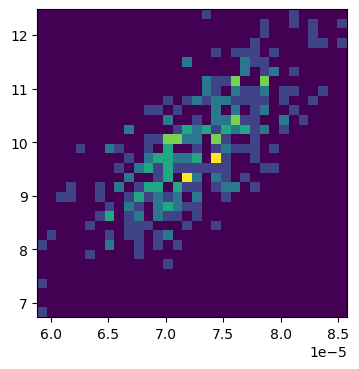

In [380]:
fig= plt.figure(figsize=(4,4))
plt.imshow(H230.T, origin='lower', extent=[binsx30[0], binsx30[-1], binsy30[0], binsy30[-1]], aspect='auto')


g)

Las variables sí están correlacionadas ya que en la gráfica se percibe una pendiente positiva. De modo que esto implica la correlación entre las variables implicadas.

h,i)

In [381]:
def Int_conf(H2,binsx):
    H1=np.sum(H2,axis=1)
    cs = np.cumsum(H1)
    ij = np.searchsorted( cs, np.percentile(cs,16) )
    ii = np.searchsorted( cs, np.percentile(cs,50) )
    ji = np.searchsorted( cs, np.percentile(cs,84) )  
    
    int_lower=binsx[ij]
    best_w=binsx[ii]
    int_upper=binsx[ji]
    
    return int_lower,int_upper,best_w


In [382]:
int_lower_30,int_upper_30,best_w= Int_conf(H230,binsx30)

int_lower_30,int_upper_30,best_w

(6.303694171435677e-05, 8.157755959436669e-05, 7.230725065436174e-05)

j)

In [388]:
omegas=[]
errores=[]

In [389]:
latis=[10,20,30,40,50,60]

for j in range(1,7):
    lam_j=datos[datos.angle==latis[j-1]]
    h=np.array(lam_j.h)
    angle=np.array(lam_j.angle)
    sigmay=np.array(lam_j.sigmay)
    y=np.array(lam_j.y)
    
    Omega_j,Gravedad_j=Optimizar(j*10,y,h,sigmay)
    H2_j,binsx_j,binsy_j=DistConjunta(Omega_j,Gravedad_j)
    
    int_lower_j,int_upper_j,best_w_j= Int_conf(H2_j,binsx_j)
    
    omegas.append(best_w_j)
    errores.append([int_lower_j,int_upper_j])
    

         Current function value: 6.678019
         Iterations: 2
         Function evaluations: 88
         Gradient evaluations: 38
         Current function value: 7.270094
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
         Current function value: 3.618747
         Iterations: 2
         Function evaluations: 84
         Gradient evaluations: 36
         Current function value: 4.289906
         Iterations: 2
         Function evaluations: 80
         Gradient evaluations: 34
         Current function value: 3.310434
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 6.689985
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
         Current function value: 6.690376
         Iterations: 2
         Function evaluations: 66
         Gradient evaluations: 27
         Current function value: 7.276064
         Iterations: 2
    

         Current function value: 9.092619
         Iterations: 2
         Function evaluations: 58
         Gradient evaluations: 23
         Current function value: 9.104425
         Iterations: 2
         Function evaluations: 94
         Gradient evaluations: 41
         Current function value: 4.417349
         Iterations: 2
         Function evaluations: 94
         Gradient evaluations: 41
         Current function value: 5.165810
         Iterations: 2
         Function evaluations: 66
         Gradient evaluations: 27
         Current function value: 8.367893
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
         Current function value: 4.476812
         Iterations: 2
         Function evaluations: 68
         Gradient evaluations: 28
         Current function value: 10.845087
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
         Current function value: 4.564965
         Iterations: 2
   

         Current function value: 8.569520
         Iterations: 2
         Function evaluations: 82
         Gradient evaluations: 35
         Current function value: 8.881106
         Iterations: 2
         Function evaluations: 56
         Gradient evaluations: 22
         Current function value: 2.167496
         Iterations: 2
         Function evaluations: 68
         Gradient evaluations: 28
         Current function value: 1.747124
         Iterations: 2
         Function evaluations: 66
         Gradient evaluations: 27
         Current function value: 10.291366
         Iterations: 2
         Function evaluations: 96
         Gradient evaluations: 42
         Current function value: 8.854779
         Iterations: 2
         Function evaluations: 70
         Gradient evaluations: 29
         Current function value: 7.150417
         Iterations: 2
         Function evaluations: 70
         Gradient evaluations: 29
         Current function value: 4.725150
         Iterations: 2
   

         Current function value: 4.767130
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 6.332661
         Iterations: 2
         Function evaluations: 86
         Gradient evaluations: 37
         Current function value: 5.485229
         Iterations: 2
         Function evaluations: 80
         Gradient evaluations: 34
         Current function value: 4.378911
         Iterations: 2
         Function evaluations: 94
         Gradient evaluations: 41
         Current function value: 4.393937
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 11.820387
         Iterations: 2
         Function evaluations: 98
         Gradient evaluations: 43
         Current function value: 3.950175
         Iterations: 2
         Function evaluations: 64
         Gradient evaluations: 26
         Current function value: 11.337335
         Iterations: 2
  

         Current function value: 8.506441
         Iterations: 2
         Function evaluations: 58
         Gradient evaluations: 23
         Current function value: 9.283495
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
         Current function value: 4.996055
         Iterations: 2
         Function evaluations: 90
         Gradient evaluations: 39
         Current function value: 3.401770
         Iterations: 2
         Function evaluations: 84
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 2.615888
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 13.881790
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 2.508787
         Iterations: 2
         Function evaluations: 86
         Gradient evaluations:

         Current function value: 9.801830
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
         Current function value: 5.428243
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 10.572042
         Iterations: 2
         Function evaluations: 64
         Gradient evaluations: 26
         Current function value: 3.887171
         Iterations: 2
         Function evaluations: 94
         Gradient evaluations: 41
         Current function value: 15.136445
         Iterations: 2
         Function evaluations: 86
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 1.448787
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 3.469155
         Iterations: 2
         Function evaluations: 64
         Gradient evaluations: 26
         Current function value

         Current function value: 1.245807
         Iterations: 2
         Function evaluations: 64
         Gradient evaluations: 26
         Current function value: 6.857292
         Iterations: 2
         Function evaluations: 86
         Gradient evaluations: 37
         Current function value: 0.645701
         Iterations: 2
         Function evaluations: 82
         Gradient evaluations: 35
         Current function value: 8.624372
         Iterations: 2
         Function evaluations: 86
         Gradient evaluations: 37
         Current function value: 8.049328
         Iterations: 2
         Function evaluations: 66
         Gradient evaluations: 27
         Current function value: 2.531927
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 3.418933
         Iterations: 2
         Function evaluations: 70
         Gradient evaluations: 29
         Current function value: 2.276186
         Iterations: 2
    

         Current function value: 2.534413
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
         Current function value: 2.040634
         Iterations: 2
         Function evaluations: 114
         Gradient evaluations: 51
         Current function value: 3.108807
         Iterations: 2
         Function evaluations: 90
         Gradient evaluations: 39
         Current function value: 7.057444
         Iterations: 2
         Function evaluations: 62
         Gradient evaluations: 25
         Current function value: 2.417957
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
         Current function value: 6.195429
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
         Current function value: 7.386763
         Iterations: 2
         Function evaluations: 60
         Gradient evaluations: 24
         Current function value: 6.671003
         Iterations: 2
   

         Current function value: 3.421060
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
         Current function value: 15.379121
         Iterations: 2
         Function evaluations: 68
         Gradient evaluations: 28
         Current function value: 5.965281
         Iterations: 2
         Function evaluations: 100
         Gradient evaluations: 44
         Current function value: 6.003765
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
         Current function value: 4.391321
         Iterations: 2
         Function evaluations: 50
         Gradient evaluations: 19
         Current function value: 3.656206
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 5.045569
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 7.518324
         Iterations: 2
  

         Current function value: 5.912501
         Iterations: 2
         Function evaluations: 90
         Gradient evaluations: 39
         Current function value: 6.154510
         Iterations: 2
         Function evaluations: 84
         Gradient evaluations: 36
         Current function value: 3.404671
         Iterations: 2
         Function evaluations: 64
         Gradient evaluations: 26
         Current function value: 2.968685
         Iterations: 2
         Function evaluations: 98
         Gradient evaluations: 43
         Current function value: 6.742606
         Iterations: 2
         Function evaluations: 84
         Gradient evaluations: 36
         Current function value: 4.118265
         Iterations: 2
         Function evaluations: 92
         Gradient evaluations: 40
         Current function value: 12.307486
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
         Current function value: 5.467953
         Iterations: 2
   

         Current function value: 6.097745
         Iterations: 2
         Function evaluations: 70
         Gradient evaluations: 29
         Current function value: 5.506149
         Iterations: 2
         Function evaluations: 80
         Gradient evaluations: 34
         Current function value: 3.315739
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
         Current function value: 5.807727
         Iterations: 2
         Function evaluations: 62
         Gradient evaluations: 25
         Current function value: 7.017047
         Iterations: 2
         Function evaluations: 90
         Gradient evaluations: 39
         Current function value: 6.081666
         Iterations: 2
         Function evaluations: 64
         Gradient evaluations: 26
         Current function value: 4.134367
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 2.400329
         Iterations: 2
    

         Current function value: 7.607028
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 2.042287
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 8.171841
         Iterations: 2
         Function evaluations: 70
         Gradient evaluations: 29
         Current function value: 7.588631
         Iterations: 2
         Function evaluations: 60
         Gradient evaluations: 24
         Current function value: 7.011235
         Iterations: 2
         Function evaluations: 84
         Gradient evaluations: 36
         Current function value: 2.244194
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
         Current function value: 2.015578
         Iterations: 2
         Function evaluations: 106
         Gradient evaluations: 47
         Current function value:

         Current function value: 5.095455
         Iterations: 2
         Function evaluations: 70
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 6.531184
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 12.038073
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
         Current function value: 8.528337
         Iterations: 2
         Function evaluations: 66
         Gradient evaluations: 27
         Current function value: 2.692118
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
         Current function value: 6.503399
         Iterations: 2
         Function evaluations: 70
         Gradient evaluations: 29
         Current function value: 6.217163
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value:

         Current function value: 4.528007
         Iterations: 2
         Function evaluations: 68
         Gradient evaluations: 28
         Current function value: 7.858180
         Iterations: 2
         Function evaluations: 54
         Gradient evaluations: 21
         Current function value: 5.990197
         Iterations: 2
         Function evaluations: 60
         Gradient evaluations: 24
         Current function value: 2.980783
         Iterations: 2
         Function evaluations: 66
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 8.411894
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 4.975915
         Iterations: 2
         Function evaluations: 56
         Gradient evaluations: 22
         Current function value: 3.977892
         Iterations: 2
         Function evaluations: 60
         Gradient evaluations: 24
         Current function value: 

         Current function value: 6.871631
         Iterations: 2
         Function evaluations: 114
         Gradient evaluations: 51
         Current function value: 4.389037
         Iterations: 2
         Function evaluations: 70
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 4.822948
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 6.442022
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 5.483653
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 1.247282
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current fu

         Current function value: 6.253816
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
         Current function value: 10.307160
         Iterations: 2
         Function evaluations: 86
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 4.725282
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 4.284190
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 5.215666
         Iterations: 2
         Function evaluations: 108
         Gradient evaluations: 48
Optimization terminated successfully.
         Current function value: 8.129661
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.812524
         Ite

         Current function value: 5.174981
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 3.678094
         Iterations: 2
         Function evaluations: 90
         Gradient evaluations: 39
         Current function value: 7.623566
         Iterations: 2
         Function evaluations: 46
         Gradient evaluations: 17
         Current function value: 7.754327
         Iterations: 2
         Function evaluations: 66
         Gradient evaluations: 27
         Current function value: 3.190135
         Iterations: 2
         Function evaluations: 62
         Gradient evaluations: 25
         Current function value: 2.826192
         Iterations: 2
         Function evaluations: 90
         Gradient evaluations: 39
         Current function value: 4.724928
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
         Current function value: 3.400406
         Iterations: 2
    

         Current function value: 6.821865
         Iterations: 2
         Function evaluations: 100
         Gradient evaluations: 44
Optimization terminated successfully.
         Current function value: 6.163034
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 7.115227
         Iterations: 2
         Function evaluations: 60
         Gradient evaluations: 24
         Current function value: 2.075187
         Iterations: 2
         Function evaluations: 46
         Gradient evaluations: 17
         Current function value: 2.605070
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 4.108561
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 5.881084
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations:

         Current function value: 6.028061
         Iterations: 2
         Function evaluations: 82
         Gradient evaluations: 35
         Current function value: 5.392421
         Iterations: 2
         Function evaluations: 92
         Gradient evaluations: 40
         Current function value: 7.980416
         Iterations: 2
         Function evaluations: 100
         Gradient evaluations: 44
         Current function value: 2.391176
         Iterations: 2
         Function evaluations: 68
         Gradient evaluations: 28
         Current function value: 5.338330
         Iterations: 2
         Function evaluations: 66
         Gradient evaluations: 27
         Current function value: 7.182030
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
         Current function value: 4.461689
         Iterations: 2
         Function evaluations: 84
         Gradient evaluations: 36
         Current function value: 8.280179
         Iterations: 2
   

         Current function value: 10.580816
         Iterations: 2
         Function evaluations: 60
         Gradient evaluations: 24
         Current function value: 9.152266
         Iterations: 2
         Function evaluations: 62
         Gradient evaluations: 25
         Current function value: 9.241245
         Iterations: 2
         Function evaluations: 98
         Gradient evaluations: 43
         Current function value: 1.966836
         Iterations: 2
         Function evaluations: 54
         Gradient evaluations: 21
         Current function value: 6.159895
         Iterations: 2
         Function evaluations: 86
         Gradient evaluations: 37
         Current function value: 8.165866
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 4.506681
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value:

         Current function value: 4.465806
         Iterations: 2
         Function evaluations: 66
         Gradient evaluations: 27
         Current function value: 2.123714
         Iterations: 2
         Function evaluations: 86
         Gradient evaluations: 37
         Current function value: 5.319654
         Iterations: 2
         Function evaluations: 84
         Gradient evaluations: 36
         Current function value: 3.311676
         Iterations: 2
         Function evaluations: 82
         Gradient evaluations: 35
         Current function value: 3.007549
         Iterations: 2
         Function evaluations: 92
         Gradient evaluations: 40
         Current function value: 4.101538
         Iterations: 2
         Function evaluations: 66
         Gradient evaluations: 27
         Current function value: 9.973297
         Iterations: 2
         Function evaluations: 88
         Gradient evaluations: 38
         Current function value: 10.850676
         Iterations: 2
   

         Current function value: 2.664442
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 8.357199
         Iterations: 2
         Function evaluations: 92
         Gradient evaluations: 40
Optimization terminated successfully.
         Current function value: 6.897413
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 8.238584
         Iterations: 2
         Function evaluations: 68
         Gradient evaluations: 28
         Current function value: 7.329390
         Iterations: 2
         Function evaluations: 94
         Gradient evaluations: 41
Optimization terminated successfully.
         Current function value: 5.345371
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 5.048511
         Iterations: 2
         Function evaluations: 68
         Gradient evaluations: 

         Current function value: 5.949947
         Iterations: 2
         Function evaluations: 80
         Gradient evaluations: 34
         Current function value: 5.149475
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
         Current function value: 7.408760
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
         Current function value: 6.911268
         Iterations: 2
         Function evaluations: 80
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 6.950108
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 3.282186
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 5.686175
         Iterations: 3
         Function evaluatio

         Current function value: 7.964552
         Iterations: 2
         Function evaluations: 86
         Gradient evaluations: 37
         Current function value: 5.803281
         Iterations: 2
         Function evaluations: 56
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 3.980912
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 5.179000
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 7.754040
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 5.001122
         Iterations: 2
         Function evaluations: 66
         Gradient evaluations: 27
         Current function value: 3.128925
         Iterations: 2
         Function evaluations

         Current function value: 3.487977
         Iterations: 2
         Function evaluations: 80
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 4.059643
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 3.816390
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 7.924666
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 8.571941
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 1.742492
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminate

         Current function value: 5.057211
         Iterations: 2
         Function evaluations: 60
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 6.814836
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 4.711564
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 7.342670
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 2.040869
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 6.330416
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current funct

         Current function value: 2.258778
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
         Current function value: 3.250130
         Iterations: 2
         Function evaluations: 88
         Gradient evaluations: 38
         Current function value: 7.418150
         Iterations: 2
         Function evaluations: 50
         Gradient evaluations: 19
         Current function value: 11.229129
         Iterations: 2
         Function evaluations: 64
         Gradient evaluations: 26
         Current function value: 4.514061
         Iterations: 2
         Function evaluations: 96
         Gradient evaluations: 42
         Current function value: 2.147928
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
         Current function value: 5.879755
         Iterations: 2
         Function evaluations: 82
         Gradient evaluations: 35
         Current function value: 9.274056
         Iterations: 2
   

         Current function value: 6.004084
         Iterations: 2
         Function evaluations: 82
         Gradient evaluations: 35
         Current function value: 8.131867
         Iterations: 2
         Function evaluations: 84
         Gradient evaluations: 36
         Current function value: 3.043570
         Iterations: 2
         Function evaluations: 64
         Gradient evaluations: 26
         Current function value: 4.119770
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 3.877691
         Iterations: 2
         Function evaluations: 86
         Gradient evaluations: 37
         Current function value: 5.171023
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
         Current function value: 1.849884
         Iterations: 2
         Function evaluations: 70
         Gradient evaluations: 29
         Current function value: 4.355797
         Iterations: 2
    

         Current function value: 12.607175
         Iterations: 2
         Function evaluations: 80
         Gradient evaluations: 34
         Current function value: 6.629528
         Iterations: 2
         Function evaluations: 66
         Gradient evaluations: 27
         Current function value: 7.806939
         Iterations: 2
         Function evaluations: 54
         Gradient evaluations: 21
         Current function value: 6.493428
         Iterations: 2
         Function evaluations: 94
         Gradient evaluations: 41
         Current function value: 5.822343
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
         Current function value: 5.282771
         Iterations: 2
         Function evaluations: 70
         Gradient evaluations: 29
         Current function value: 4.847862
         Iterations: 2
         Function evaluations: 102
         Gradient evaluations: 45
Optimization terminated successfully.
         Current function val

         Current function value: 7.607837
         Iterations: 2
         Function evaluations: 88
         Gradient evaluations: 38
         Current function value: 4.189627
         Iterations: 2
         Function evaluations: 60
         Gradient evaluations: 24
         Current function value: 3.209209
         Iterations: 2
         Function evaluations: 82
         Gradient evaluations: 35
         Current function value: 3.940233
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 5.690899
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
         Current function value: 4.899232
         Iterations: 2
         Function evaluations: 114
         Gradient evaluations: 51
         Current function value: 3.316986
         Iterations: 2
         Function evaluations: 82
         Gradient evaluations: 35
         Current function value: 6.196530
         Iterations: 2
   

         Current function value: 5.127759
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 5.885383
         Iterations: 2
         Function evaluations: 66
         Gradient evaluations: 27
         Current function value: 1.396322
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 13.543291
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 4.871403
         Iterations: 2
         Function evaluations: 68
         Gradient evaluations: 28
         Current function value: 5.774885
         Iterations: 2
         Function evaluations: 48
         Gradient evaluations: 18
         Current function value: 1.874726
         Iterations: 2
         Function evaluations: 62
         Gradient evaluations: 25
         Current function value:

         Current function value: 8.385581
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
         Current function value: 2.571458
         Iterations: 2
         Function evaluations: 66
         Gradient evaluations: 27
         Current function value: 5.180297
         Iterations: 2
         Function evaluations: 70
         Gradient evaluations: 29
         Current function value: 2.213349
         Iterations: 2
         Function evaluations: 92
         Gradient evaluations: 40
         Current function value: 5.060286
         Iterations: 2
         Function evaluations: 66
         Gradient evaluations: 27
         Current function value: 12.353427
         Iterations: 2
         Function evaluations: 86
         Gradient evaluations: 37
         Current function value: 2.743203
         Iterations: 2
         Function evaluations: 84
         Gradient evaluations: 36
         Current function value: 5.512712
         Iterations: 2
   

In [391]:
omegas, errores

([6.381483147256846e-05,
  6.891906312239161e-05,
  6.987968888436405e-05,
  8.148325453196e-05,
  9.546123432134981e-05,
  0.0001254566900057274],
 [[5.4847743739245875e-05, 7.278191920589104e-05],
  [6.0140562751439066e-05, 7.769756349334416e-05],
  [6.132140115233233e-05, 7.843797661639575e-05],
  [7.099617914742523e-05, 9.197032991649476e-05],
  [8.310308125285767e-05, 0.00010781938738984194],
  [0.00010913848891576589, 0.00014177489109568888]])

In [392]:
Combinado=np.mean(omegas)
Combinado

8.416912705639355e-05

In [395]:
errores_new=[]
for i in range(len(errores)):
    prom=np.abs(errores[i][0]-errores[i][1])/2
    errores_new.append(prom)

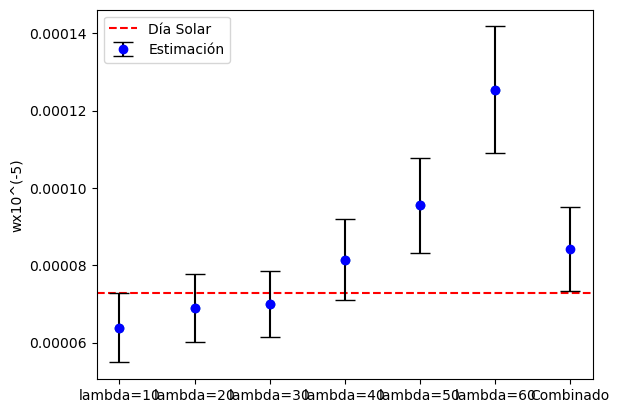

In [396]:
plt.scatter(latis,omegas)
plt.axhline(7.27e-5, linestyle = 'dashed', color = 'r', label="Día Solar")

for i in range(len(omegas)):
    ax = plt.errorbar(latis[i], omegas[i], yerr = errores_new[i], fmt="ob", capsize=7, ecolor="k")
    
plt.errorbar(70, Combinado, linestyle="None", yerr = np.sum(errores_new)/len(errores_new), fmt="ob", capsize=7, ecolor="k", label = "Estimación")
plt.xticks(latis + [70],["Lambda=10", "lambda=20", "lambda=30", "lambda=40", "lambda=50", "lambda=60", "Combinado"])
plt.ylabel('wx10^(-5)')
plt.legend()